In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('D:\CoreProject\ProjectData_50k.csv')

In [3]:
df.shape

(50000, 17)

In [4]:
df.head(10)

,Name,Age,Gender,10th Percent,12th Percent,JEE Rank,Opted for Coaching,Backup Options,Extra Curricular Activities(Distinct),Reason to Choose BMU,Family Income(INR),Dependent Members,Month of Visit,Source of Information,Home Location,TotalScore,Admitted
0,jhwtjcl,21,Male,87.73,60.91,125581,Yes,Yes,2,Course Preference,2327565,2,May,Direct Interaction,Rural,48,No
1,nvfosta,21,Female,88.28,90.72,162465,Yes,Yes,1,Course Preference,3304970,5,Aug,Advertisement,Urban,49,No
2,eshrydx,20,Male,85.03,96.00,296064,No,Yes,1,College Reputation,569232,2,June,Direct Interaction,Town,40,No
3,jmylfze,19,Female,72.93,91.34,241221,Yes,Yes,3,Course Preference,3532458,4,Aug,Direct Interaction,Rural,49,No
4,nxclxyd,21,Female,71.28,85.05,90648,No,Yes,1,College Infrastructure,1360848,0,May,Direct Interaction,Town,45,No
5,gmuuqop,19,Female,95.54,62.73,141688,Yes,Yes,5,Course Preference,4880951,4,May,Relative,Town,48,No
6,qgrkoej,18,Male,71.70,77.50,79243,No,Yes,0,College Infrastructure,2994654,2,Aug,Relative,Rural,48,No
7,dvmsivm,20,Male,90.96,87.34,13886,No,No,5,College Reputation,1771747,4,July,Advertisement,Town,58,Yes
8,undcnpv,18,Male,74.09,67.08,3292,Yes,No,2,College Infrastructure,2279876,3,July,Direct Interaction,Town,56,Yes
9,eluovua,18,Female,93.82,96.88,215404,Yes,Yes,3,College Reputation,3943914,0,Aug,Advertisement,Town,53,Yes


In [5]:
df.apply(lambda x: sum(x.isnull()) )

Name                                     0
Age                                      0
Gender                                   0
10th Percent                             0
12th Percent                             0
JEE Rank                                 0
Opted for Coaching                       0
Backup Options                           0
Extra Curricular Activities(Distinct)    0
Reason to Choose BMU                     0
Family Income(INR)                       0
Dependent Members                        0
Month of Visit                           0
Source of Information                    0
Home Location                            0
TotalScore                               0
Admitted                                 0
dtype: int64

In [6]:
df.drop(["Name", "TotalScore"], axis = 1, inplace = True) 

In [7]:
df.head()

,Age,Gender,10th Percent,12th Percent,JEE Rank,Opted for Coaching,Backup Options,Extra Curricular Activities(Distinct),Reason to Choose BMU,Family Income(INR),Dependent Members,Month of Visit,Source of Information,Home Location,Admitted
0,21,Male,87.73,60.91,125581,Yes,Yes,2,Course Preference,2327565,2,May,Direct Interaction,Rural,No
1,21,Female,88.28,90.72,162465,Yes,Yes,1,Course Preference,3304970,5,Aug,Advertisement,Urban,No
2,20,Male,85.03,96.00,296064,No,Yes,1,College Reputation,569232,2,June,Direct Interaction,Town,No
3,19,Female,72.93,91.34,241221,Yes,Yes,3,Course Preference,3532458,4,Aug,Direct Interaction,Rural,No
4,21,Female,71.28,85.05,90648,No,Yes,1,College Infrastructure,1360848,0,May,Direct Interaction,Town,No


In [8]:
# df.dtypes

In [9]:
# Categorical boolean mask
categorical_feature_mask = df.dtypes==object

In [10]:
categorical_feature_mask

Age                                      False
Gender                                    True
10th Percent                             False
12th Percent                             False
JEE Rank                                 False
Opted for Coaching                        True
Backup Options                            True
Extra Curricular Activities(Distinct)    False
Reason to Choose BMU                      True
Family Income(INR)                       False
Dependent Members                        False
Month of Visit                            True
Source of Information                     True
Home Location                             True
Admitted                                  True
dtype: bool

In [11]:
# filter categorical columns using mask and turn it into a list
categorical_cols = df.columns[categorical_feature_mask].tolist()

In [12]:
categorical_cols

['Gender',
 'Opted for Coaching',
 'Backup Options',
 'Reason to Choose BMU',
 'Month of Visit',
 'Source of Information',
 'Home Location',
 'Admitted']

In [13]:
labelencoder = LabelEncoder()

In [14]:
df[categorical_cols] = df[categorical_cols].apply(lambda colm: labelencoder.fit_transform(colm))

In [15]:
df.head()

,Age,Gender,10th Percent,12th Percent,JEE Rank,Opted for Coaching,Backup Options,Extra Curricular Activities(Distinct),Reason to Choose BMU,Family Income(INR),Dependent Members,Month of Visit,Source of Information,Home Location,Admitted
0,21,1,87.73,60.91,125581,1,1,2,2,2327565,2,3,1,0,0
1,21,0,88.28,90.72,162465,1,1,1,2,3304970,5,0,0,2,0
2,20,1,85.03,96.00,296064,0,1,1,1,569232,2,2,1,1,0
3,19,0,72.93,91.34,241221,1,1,3,2,3532458,4,0,1,0,0
4,21,0,71.28,85.05,90648,0,1,1,0,1360848,0,3,1,1,0


In [16]:
y = df.iloc[:, -1].values
y

array([0, 0, 0, ..., 0, 0, 0])

In [17]:
df.drop(["Age","Admitted"], axis = 1, inplace = True) 

In [18]:
df.head()

,Gender,10th Percent,12th Percent,JEE Rank,Opted for Coaching,Backup Options,Extra Curricular Activities(Distinct),Reason to Choose BMU,Family Income(INR),Dependent Members,Month of Visit,Source of Information,Home Location
0,1,87.73,60.91,125581,1,1,2,2,2327565,2,3,1,0
1,0,88.28,90.72,162465,1,1,1,2,3304970,5,0,0,2
2,1,85.03,96.00,296064,0,1,1,1,569232,2,2,1,1
3,0,72.93,91.34,241221,1,1,3,2,3532458,4,0,1,0
4,0,71.28,85.05,90648,0,1,1,0,1360848,0,3,1,1


In [19]:
categorical_feature_mask = df.dtypes==object

In [20]:
hotencode = OneHotEncoder(categorical_features=categorical_feature_mask, sparse=False)

In [21]:
X = hotencode.fit_transform(df)

c:\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
c:\python\python36\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [22]:
X

array([[ 1.  , 87.73, 60.91, ...,  3.  ,  1.  ,  0.  ],
       [ 0.  , 88.28, 90.72, ...,  0.  ,  0.  ,  2.  ],
       [ 1.  , 85.03, 96.  , ...,  2.  ,  1.  ,  1.  ],
       ...,
       [ 1.  , 72.97, 72.79, ...,  3.  ,  0.  ,  1.  ],
       [ 0.  , 79.15, 68.55, ...,  2.  ,  0.  ,  2.  ],
       [ 1.  , 96.82, 61.88, ...,  3.  ,  1.  ,  2.  ]])

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [24]:
df.shape

(50000, 13)

# 1. Predicting results using Logistic Regression

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [26]:

model = LogisticRegression()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(model.score(X_test, y_test))

cm = confusion_matrix(y_test, y_pred)
# print(cm)

c_report = classification_report(y_test, y_pred)




0.82464


c:\python\python36\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


#### Classification Report of Logistic Regression 

In [33]:
print(c_report)

              precision    recall  f1-score   support

           0       0.87      0.91      0.89      9648
           1       0.64      0.52      0.57      2852

    accuracy                           0.82     12500
   macro avg       0.75      0.72      0.73     12500
weighted avg       0.81      0.82      0.82     12500



# Prediction results using SVM Implementation (Not Using)

In [28]:
# from sklearn import svm

# clf = svm.SVC()

# clf.fit(X_train, y_train)

# y_pred = clf.predict(X_test)

# from sklearn import metrics

# print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

In [29]:
# from sklearn.svm import SVC 
# svm_model_linear = SVC(kernel = 'linear', C = 1).fit(X_train, y_train) 
# svm_predictions = svm_model_linear.predict(X_test) 
  
# # model accuracy for X_test   
# accuracy = svm_model_linear.score(X_test, y_test) 
  
# # creating a confusion matrix 
# cm = confusion_matrix(y_test, svm_predictions) 
# # print("Accuracy:",metrics.accuracy_score(y_test, svm_predictions))
# print("Accuracy: ",accuracy)

# 2. Predicting results using Naive Bayes Implementation

In [30]:
from sklearn.naive_bayes import GaussianNB


In [31]:
model = GaussianNB()

In [32]:
model.fit(X_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

In [33]:
y_pred = model.predict(X_test)

In [34]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8316


# 3.1. Predicting results using Neural Networks

In [33]:
import keras

In [34]:
from keras import Sequential
from keras.layers import Dense

In [35]:
classifier = Sequential()

In [36]:
# First Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal', input_dim=13))

In [37]:
# Second Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))

In [38]:
# Third Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))

In [39]:
# Fourth Hidden Layer
classifier.add(Dense(7, activation='relu', kernel_initializer='random_normal'))

In [40]:
#Output Layer
classifier.add(Dense(1, activation='sigmoid', kernel_initializer='random_normal'))

In [41]:
# Compiling the neural network
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [42]:
history = classifier.fit(X, y, validation_split=0.25, batch_size=150, epochs=250)

Train on 37500 samples, validate on 12500 samples
Epoch 1/250
37500/37500 [==============================] - 0s 13us/step - loss: 0.4415 - accuracy: 0.7752 - val_loss: 0.4000 - val_accuracy: 0.7794
Epoch 2/250
37500/37500 [==============================] - 0s 9us/step - loss: 0.4084 - accuracy: 0.7801 - val_loss: 0.4003 - val_accuracy: 0.8168
Epoch 3/250
37500/37500 [==============================] - ETA: 0s - loss: 0.4094 - accuracy: 0.81 - 0s 9us/step - loss: 0.4069 - accuracy: 0.8143 - val_loss: 0.3992 - val_accuracy: 0.8211
Epoch 4/250
37500/37500 [==============================] - 0s 9us/step - loss: 0.4061 - accuracy: 0.8169 - val_loss: 0.3987 - val_accuracy: 0.8157
Epoch 5/250
37500/37500 [==============================] - 0s 9us/step - loss: 0.4054 - accuracy: 0.8164 - val_loss: 0.3977 - val_accuracy: 0.8223
Epoch 6/250
37500/37500 [==============================] - 0s 9us/step - loss: 0.4052 - accuracy: 0.8168 - val_loss: 0.4016 - val_accuracy: 0.8237
Epoch 7/250
37500/37500 [

In [56]:
print(history.history.keys())


dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])


In [57]:
# print(history.history['loss'])

In [58]:
# print(history.history['accuracy'])

In [59]:
# lenght = len(history.history['loss'])

# for i in range(lenght):
#     a = history.history['loss'][i]
#     b = history.history['accuracy'][i]
    
#     print(b-a)

<IPython.core.display.Javascript object>


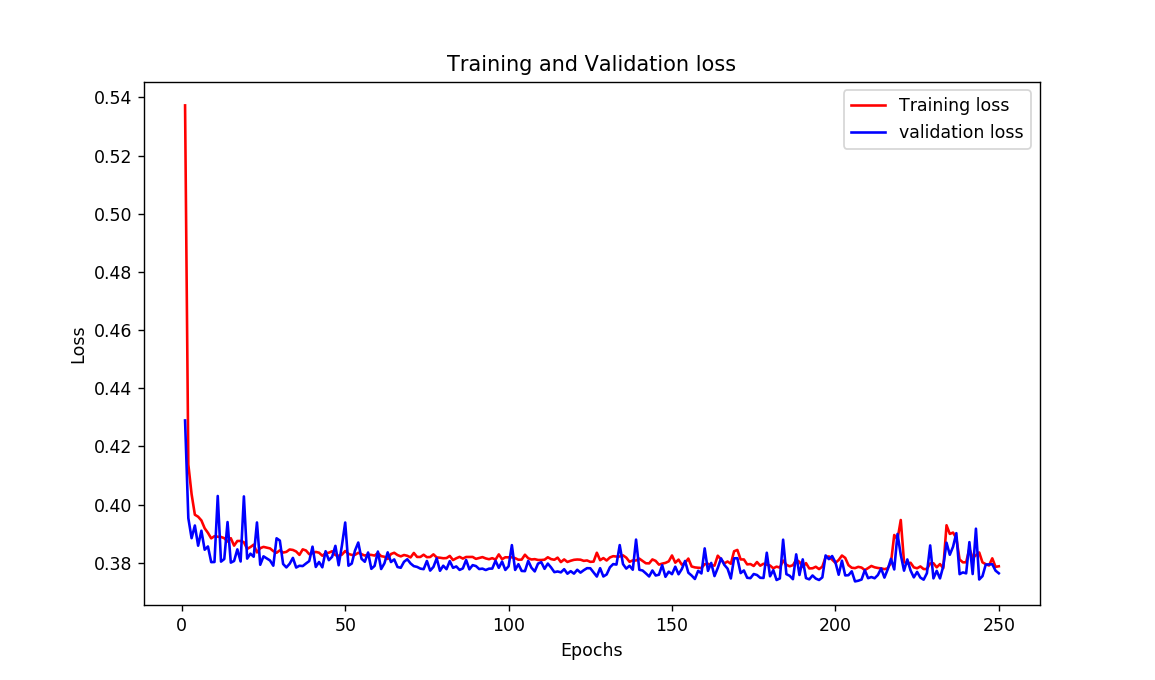

In [60]:
%matplotlib notebook
loss_train = history.history['loss']
loss_val = history.history['val_loss']
epochs = range(1,251)
plt.plot(epochs, loss_train, 'r', label='Training loss')
plt.plot(epochs, loss_val, 'b', label='validation loss')
plt.title('Training and Validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

<IPython.core.display.Javascript object>


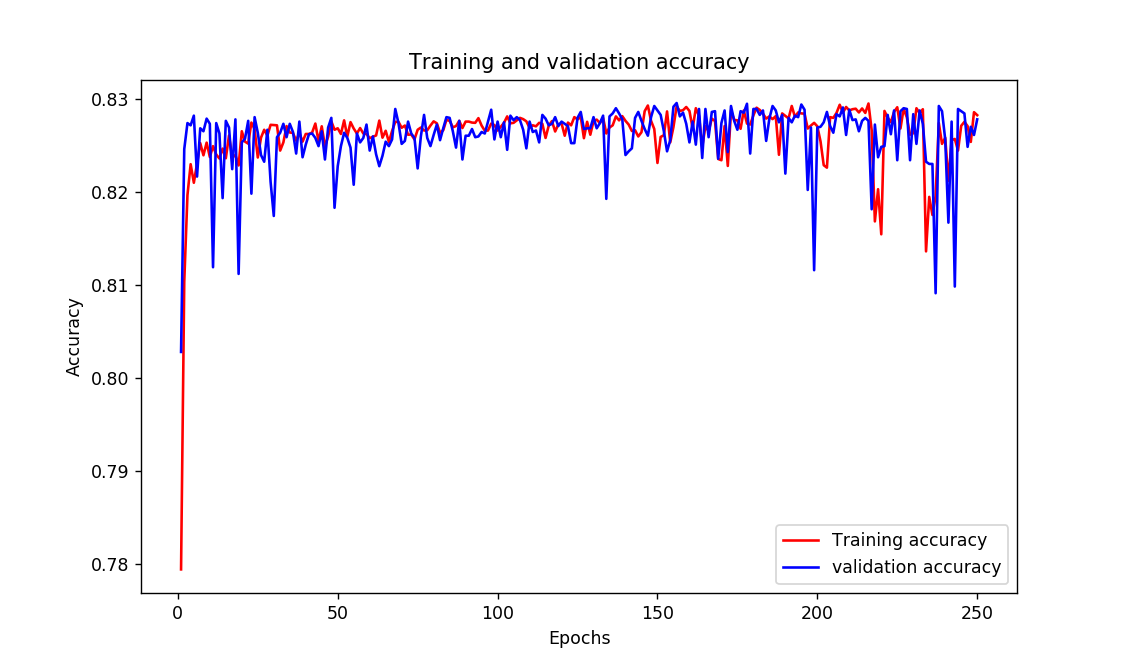

In [61]:
%matplotlib notebook
accuracy_train = history.history['accuracy']
loss_val = history.history['val_accuracy']
epochs = range(1,251)
plt.plot(epochs, accuracy_train, 'r', label='Training accuracy')
plt.plot(epochs, loss_val, 'b', label='validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [62]:
X_train.shape

(37500, 13)

In [63]:
eval_model = classifier.evaluate(X_train, y_train)
print(eval_model)

37500/37500 [==============================] - 1s 23us/step
[0.23005271351178488, 0.9048266410827637]


# 4.2. Saving the model in hard disk

In [64]:
# from keras.models import model_from_json

In [65]:
# model_json = classifier.to_json()



In [66]:
# with open("model.json", "w") as json_file:
    
#     json_file.write(model_json)
    
# # serialize weights to HDF5
# classifier.save_weights("classifier.h5")

# print("Saved model to disk")

# 5. Implementation of LightGBM

In [34]:
import lightgbm as lgb

In [35]:
d_train = lgb.Dataset(X_train, label=y_train)

In [36]:
params = {}

params['learning_rate'] = 0.03
params['boosting_type'] = 'gbdt'
params['objective'] = 'binary'
params['metric'] = 'binary_logloss'
params['sub_feature'] = 0.5
params['num_leaves'] = 100
params['min_data'] = 500
params['max_depth'] = 100

In [37]:
clf = lgb.train(params, d_train, 1000)

In [38]:
#Prediction

y_pred=clf.predict(X_test)
#convert into binary values
for i in range(0,12500):
    if y_pred[i]>=0.5:       # setting threshold to .5
       y_pred[i]=1
    else:  
       y_pred[i]=0

In [39]:
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_pred,y_test)


In [40]:
print("Accuracy of the model is: ", accuracy)


Accuracy of the model is:  0.98464


In [41]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(y_test, y_pred)

In [42]:
print(cm)

[[9581   67]
 [ 125 2727]]


In [44]:
c_report = classification_report(y_test, y_pred)

#### Classfication Report for the LightGBM

In [45]:
print(c_report)

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      9648
           1       0.98      0.96      0.97      2852

    accuracy                           0.98     12500
   macro avg       0.98      0.97      0.98     12500
weighted avg       0.98      0.98      0.98     12500

